In [74]:
from train2 import test_model 
import torch
import torch.optim as optim
import os
from yolo import Yolo
from loss import Loss
from utils import  AverageMeter,class_accuracy
from dataset import get_data
import warnings
import time
warnings.filterwarnings("ignore")
from dataset import YOLODataset
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import random

In [9]:
model = Yolo(3, 6//2, 2)
model.load_state_dict(torch.load(r'C:\Users\Benedetta\Downloads\model_100_epochs.pt'))
train_loader, test_loader = get_data('train.csv','test.csv')
S=[13, 26]
ANCHORS =  [[(0.275 ,   0.320312), (0.068   , 0.113281), (0.017  ,  0.03   )], 
           [(0.03  ,   0.056   ), (0.01  ,   0.018   ), (0.006 ,   0.01    )]]

scaled_anchors = (
        torch.tensor(ANCHORS)
        * torch.tensor(S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
    ).to("cuda:0")

optimizer = optim.SGD(
        model.parameters(), lr=0.001, weight_decay=0.0005
    )
loss_fn = Loss()


test_model(model, test_loader, scaled_anchors, performance=class_accuracy, loss_fn= Loss(), device='cuda:0')

TESTING - loss nan - performance_class 93.7221 , performance_obj 41.0298 ,performance_noobj 99.9098


(nan,
 tensor(93.7221, device='cuda:0'),
 tensor(41.0298, device='cuda:0'),
 tensor(99.9098, device='cuda:0'))

In [62]:
IMAGE_SIZE = 416
import albumentations as A
from albumentations.pytorch import ToTensorV2
transforms = A.Compose(
    [
        A.LongestMaxSize(max_size=IMAGE_SIZE),
        A.PadIfNeeded(
            min_height=IMAGE_SIZE, min_width=IMAGE_SIZE, border_mode=cv2.BORDER_CONSTANT
        ),
        A.Normalize(mean=[0, 0, 0], std=[1, 1, 1], max_pixel_value=255,),
        ToTensorV2(),
    ],
    bbox_params=A.BboxParams(format="yolo", min_visibility=0.4, label_fields=[]),
    )

In [ ]:
DATASET = 'dataset'
IMG_DIR = DATASET + "/images/"
LABEL_DIR = DATASET + "/labels/"
dataset = YOLODataset(
        "train.csv",
        IMG_DIR, 
        LABEL_DIR,
        S=[13, 26],
        anchors=ANCHORS,
        transform=transforms,
    )

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[0.0, 1.0, 0.49038463830947876, 0.38701924681663513, 0.6062240600585938, 0.765625], [0.0, 1.0, 0.49038463830947876, 0.38701924681663513, 0.6062240600585938, 0.765625]]


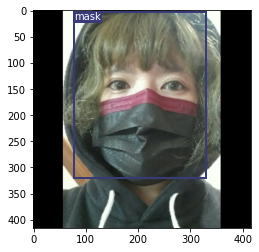

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.49038463830947876, 0.14903846383094788, 0.06967397779226303, 0.08349770307540894], [1.0, 1.0, 0.49038463830947876, 0.14903846383094788, 0.06967397779226303, 0.08349770307540894]]


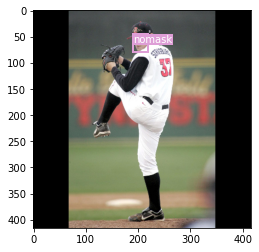

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.22836539149284363, 0.254807710647583, 0.0625, 0.08189266920089722], [1.0, 1.0, 0.822115421295166, 0.26682692766189575, 0.04296875, 0.07506828755140305], [1.0, 1.0, 0.22836539149284363, 0.254807710647583, 0.0625, 0.08189266920089722], [1.0, 1.0, 0.822115421295166, 0.26682692766189575, 0.04296875, 0.07506828755140305]]


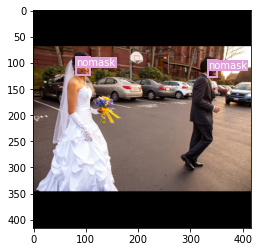

, 0.00975039042532444], [1.0, 1.0, 0.2572115361690521, 0.5625, 0.0048828125, 0.006825272925198078], [1.0, 1.0, 0.3461538553237915, 0.5552884936332703, 0.00390625, 0.006825272925198078], [1.0, 1.0, 0.4086538553237915, 0.6057692766189575, 0.005859375, 0.006825272925198078], [1.0, 1.0, 0.47836539149284363, 0.5528846383094788, 0.005859375, 0.006825272925198078], [1.0, 1.0, 0.567307710647583, 0.5552884936332703, 0.005859375, 0.006825272925198078], [1.0, 1.0, 0.6442307829856873, 0.5480769276618958, 0.0048828125, 0.006825272925198078], [1.0, 1.0, 0.7259615659713745, 0.5528846383094788, 0.0048828125, 0.0078003122471272945], [1.0, 1.0, 0.7740384936332703, 0.6105769276618958, 0.0048828125, 0.006825272925198078], [1.0, 1.0, 0.17788462340831757, 0.629807710647583, 0.0078125, 0.00975039042532444], [1.0, 1.0, 0.26442307233810425, 0.6322115659713745, 0.0078125, 0.00975039042532444], [1.0, 1.0, 0.3389423191547394, 0.6225962042808533, 0.0048828125, 0.006825272925198078], [1.0, 1.0, 0.4134615659713745, 

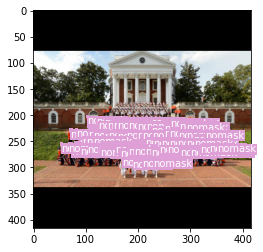

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.45673078298568726, 0.36298078298568726, 0.014648438431322575, 0.020544499158859253], [1.0, 1.0, 0.10576923191547394, 0.32211539149284363, 0.017578125, 0.02347942814230919], [1.0, 1.0, 0.19951923191547394, 0.317307710647583, 0.01953125, 0.019566191360354424], [1.0, 1.0, 0.26442307233810425, 0.3365384638309479, 0.0185546875, 0.02347942814230919], [1.0, 1.0, 0.3461538553237915, 0.36538463830947876, 0.0185546875, 0.026414357125759125], [1.0, 1.0, 0.42067310214042664, 0.33173078298568726, 0.0185546875, 0.02347942814230919], [1.0, 1.0, 0.5841346383094788, 0.32692310214042664, 0.017578125, 0.02152280882000923], [1.0, 1.0, 0.6634615659713745, 0.3461538553237915, 0.0205078125, 0.02347942814230919], [1.0, 1.0, 0.733173131942749, 0.3774038553237915, 0.01953125, 0.024457737803459167], [1.0, 1.0, 0.7980769276618958, 0.375, 0.017578125, 0.020544499158859253], [1.0, 1.0, 0.9326923

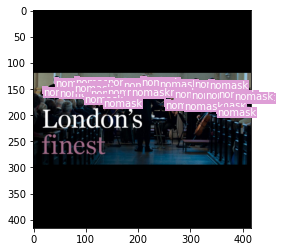

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.06730769574642181, 0.540865421295166, 0.138671875, 0.526032567024231], [1.0, 1.0, 0.6225962042808533, 0.603365421295166, 0.1054687574505806, 0.14931908249855042], [1.0, 1.0, 0.6009615659713745, 0.6850962042808533, 0.044921875, 0.04977302625775337], [1.0, 1.0, 0.3822115659713745, 0.7403846383094788, 0.048828125, 0.06148432567715645], [1.0, 1.0, 0.48798078298568726, 0.733173131942749, 0.044921875, 0.06148432567715645], [1.0, 1.0, 0.5456730723381042, 0.6442307829856873, 0.02734375186264515, 0.04196549579501152], [1.0, 1.0, 0.23076924681663513, 0.7091346383094788, 0.03515625, 0.0536767952144146], [1.0, 1.0, 0.9399038553237915, 0.7139423489570618, 0.037109375, 0.05172491446137428], [1.0, 1.0, 0.06730769574642181, 0.540865421295166, 0.138671875, 0.526032567024231], [1.0, 1.0, 0.6225962042808533, 0.603365421295166, 0.1054687574505806, 0.14931908249855042], [1.0, 1.0, 0.545

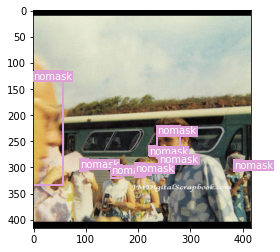

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[0.0, 1.0, 0.5288461446762085, 0.38701924681663513, 0.5815045237541199, 0.71875], [0.0, 1.0, 0.5288461446762085, 0.38701924681663513, 0.5815045237541199, 0.71875]]


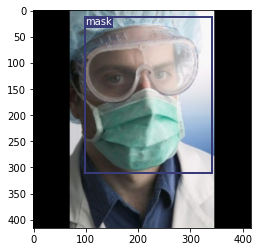

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[0.0, 1.0, 0.29326924681663513, 0.3509615659713745, 0.2031250149011612, 0.2537933588027954], [0.0, 1.0, 0.29326924681663513, 0.3509615659713745, 0.2031250149011612, 0.2537933588027954]]


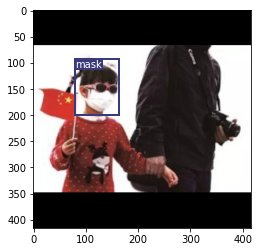

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[0.0, 1.0, 0.48798078298568726, 0.23557692766189575, 0.26538461446762085, 0.30859375], [0.0, 1.0, 0.48798078298568726, 0.23557692766189575, 0.26538461446762085, 0.30859375]]


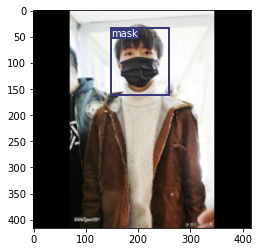

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.23076924681663513, 0.5528846383094788, 0.059469372034072876, 0.07561729103326797], [1.0, 1.0, 0.49278849363327026, 0.6057692766189575, 0.10349215567111969, 0.16126543283462524], [1.0, 1.0, 0.23076924681663513, 0.5528846383094788, 0.059469372034072876, 0.07561729103326797], [1.0, 1.0, 0.49278849363327026, 0.6057692766189575, 0.10349215567111969, 0.16126543283462524]]


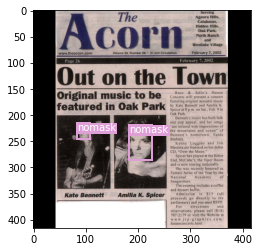

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.06490384787321091, 0.2524038553237915, 0.04296875, 0.0546875037252903], [1.0, 1.0, 0.14182692766189575, 0.26201924681663513, 0.0400390625, 0.0566406287252903], [1.0, 1.0, 0.44711539149284363, 0.29567310214042664, 0.0419921875, 0.0576171912252903], [1.0, 1.0, 0.8701923489570618, 0.26442307233810425, 0.0419921875, 0.0546875037252903], [1.0, 1.0, 0.3125, 0.375, 0.04296875, 0.0585937537252903], [1.0, 1.0, 0.540865421295166, 0.3822115659713745, 0.0400390625, 0.0605468787252903], [1.0, 1.0, 0.6850962042808533, 0.375, 0.04296875, 0.0605468787252903], [1.0, 1.0, 0.8076923489570618, 0.379807710647583, 0.04296875, 0.0576171912252903], [1.0, 1.0, 0.17788462340831757, 0.38461539149284363, 0.044921875, 0.0615234412252903], [1.0, 1.0, 0.42548078298568726, 0.39663463830947876, 0.0458984375, 0.0576171912252903], [1.0, 1.0, 0.38942310214042664, 0.2163461595773697, 0.0322265625, 0.05

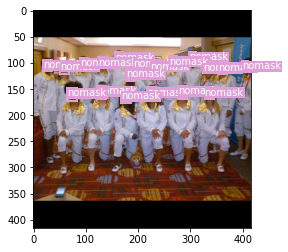

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.6682692766189575, 0.36057692766189575, 0.1455078125, 0.1904296875], [1.0, 1.0, 0.3149038553237915, 0.38701924681663513, 0.13671875, 0.2089843899011612], [1.0, 1.0, 0.6682692766189575, 0.36057692766189575, 0.1455078125, 0.1904296875], [1.0, 1.0, 0.3149038553237915, 0.38701924681663513, 0.13671875, 0.2089843899011612]]


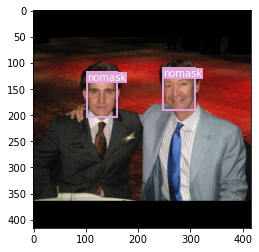

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.49278849363327026, 0.49038463830947876, 0.2783203125, 0.3837890625], [1.0, 1.0, 0.49278849363327026, 0.49038463830947876, 0.2783203125, 0.3837890625]]


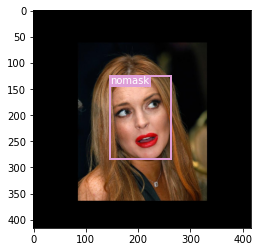

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.5024038553237915, 0.411057710647583, 0.169921875, 0.2255859524011612], [1.0, 1.0, 0.5024038553237915, 0.411057710647583, 0.169921875, 0.2255859524011612]]


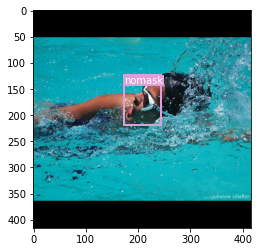

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.254807710647583, 0.29326924681663513, 0.01171875, 0.01462438516318798], [1.0, 1.0, 0.5216346383094788, 0.22596155107021332, 0.01171875, 0.01462438516318798], [1.0, 1.0, 0.024038461968302727, 0.26682692766189575, 0.014648438431322575, 0.022424057126045227], [1.0, 1.0, 0.1274038553237915, 0.29567310214042664, 0.009765625, 0.011699507012963295], [1.0, 1.0, 0.18269231915473938, 0.2740384638309479, 0.0107421875, 0.017549261450767517], [1.0, 1.0, 0.29807692766189575, 0.23557692766189575, 0.017578125, 0.020474139600992203], [1.0, 1.0, 0.4663461744785309, 0.23798078298568726, 0.013671875931322575, 0.017549261450767517], [1.0, 1.0, 0.7788462042808533, 0.2572115361690521, 0.0166015625, 0.017549261450767517], [1.0, 1.0, 0.8341346383094788, 0.3413461744785309, 0.014648438431322575, 0.016574302688241005], [1.0, 1.0, 0.8725962042808533, 0.4086538553237915, 0.014648438431322575, 0

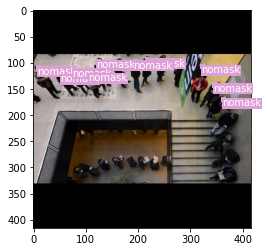

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[0.0, 1.0, 0.5745192766189575, 0.3990384638309479, 0.6796875, 0.75], [0.0, 1.0, 0.5745192766189575, 0.3990384638309479, 0.6796875, 0.75]]


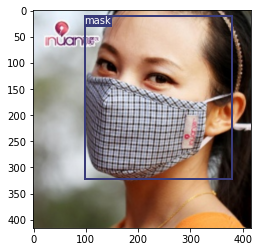

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.7307692766189575, 0.09615384787321091, 0.0595703162252903, 0.06828561425209045], [1.0, 1.0, 0.23557692766189575, 0.25961539149284363, 0.0654296875, 0.0751141756772995], [1.0, 1.0, 0.7307692766189575, 0.09615384787321091, 0.0595703162252903, 0.06828561425209045], [1.0, 1.0, 0.23557692766189575, 0.25961539149284363, 0.0654296875, 0.0751141756772995]]


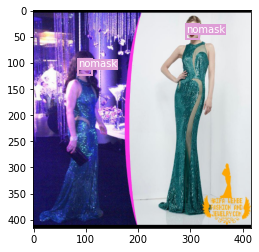

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[0.0, 1.0, 0.6322115659713745, 0.4663461744785309, 0.4000000059604645, 0.4825893044471741], [0.0, 1.0, 0.6322115659713745, 0.4663461744785309, 0.4000000059604645, 0.4825893044471741]]


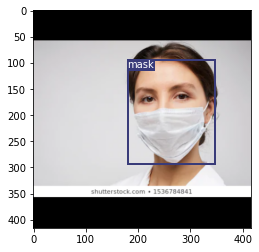

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[0.0, 1.0, 0.45432692766189575, 0.4326923191547394, 0.6171875, 0.63671875], [0.0, 1.0, 0.45432692766189575, 0.4326923191547394, 0.6171875, 0.63671875]]


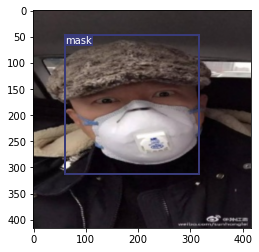

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[0.0, 1.0, 0.4350961744785309, 0.24519231915473938, 0.3046875, 0.29296875], [0.0, 1.0, 0.4350961744785309, 0.24519231915473938, 0.3046875, 0.29296875]]


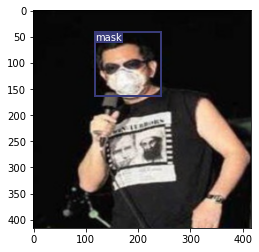

torch.Size([3, 2])
torch.Size([1, 3, 13, 13, 6])
13
3
torch.Size([3, 2])
torch.Size([1, 3, 26, 26, 6])
26
3
[[1.0, 1.0, 0.19951923191547394, 0.30288463830947876, 0.021484375, 0.03997142240405083], [1.0, 1.0, 0.48317310214042664, 0.3677884638309479, 0.02929687686264515, 0.03509686142206192], [1.0, 1.0, 0.6995192766189575, 0.3413461744785309, 0.033203125, 0.045820899307727814], [1.0, 1.0, 0.826923131942749, 0.3461538553237915, 0.0244140625, 0.031197207048535347], [1.0, 1.0, 0.19951923191547394, 0.30288463830947876, 0.021484375, 0.03997142240405083], [1.0, 1.0, 0.6995192766189575, 0.3413461744785309, 0.033203125, 0.045820899307727814], [1.0, 1.0, 0.48317310214042664, 0.3677884638309479, 0.02929687686264515, 0.03509686142206192], [1.0, 1.0, 0.826923131942749, 0.3461538553237915, 0.0244140625, 0.031197207048535347]]


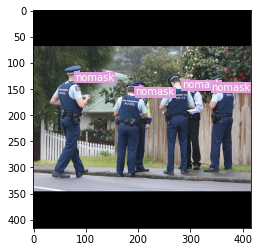

ValueError: Expected x_max for bbox (0.80078125, 0.125, 1.00390625, 0.47265625, 0.0) to be in the range [0.0, 1.0], got 1.00390625.

In [83]:
S = [13, 26]
scaled_anchors = torch.tensor(ANCHORS) / (
        1 / torch.tensor(S).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
    )
loader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)
for x, y in loader:
    boxes = []
    for i in range(2):
        anchor = scaled_anchors[i]
        print(anchor.shape)
        print(y[i].shape)
        print(y[i].shape[2])
        boxes += cells_to_bboxes(
            
            y[i], is_preds=False, S=y[i].shape[2], anchors=ANCHORS
        )[0]
    boxes = nms(boxes, iou_threshold=1, threshold=0.7, box_format="midpoint")
    print(boxes)
    plot_image(x[0].permute(1, 2, 0).to("cpu"), boxes)

In [82]:
def cells_to_bboxes(predictions, anchors, S, is_preds=True):
    """
    Scales the predictions coming from the model to
    be relative to the entire image such that they for example later
    can be plotted or.
    INPUT:
    predictions: tensor of size (N, 3, S, S, num_classes+5)
    anchors: the anchors used for the predictions
    S: the number of cells the image is divided in on the width (and height)
    is_preds: whether the input is predictions or the true bounding boxes
    OUTPUT:
    converted_bboxes: the converted boxes of sizes (N, num_anchors, S, S, 1+5) with class index,
                      object score, bounding box coordinates
    """
    BATCH_SIZE = predictions.shape[0]
    num_anchors = 3
    print(num_anchors)
    box_predictions = predictions[..., 1:5]
    if is_preds:
        anchors = anchors.reshape(1, 3, 1, 1, 2)
        box_predictions[..., 0:2] = torch.sigmoid(box_predictions[..., 0:2])
        box_predictions[..., 2:] = torch.exp(box_predictions[..., 2:]) * anchors
        scores = torch.sigmoid(predictions[..., 0:1])
        best_class = torch.argmax(predictions[..., 5:], dim=-1).unsqueeze(-1)
    else:
        scores = predictions[..., 0:1]
        best_class = predictions[..., 5:6]

    cell_indices = (
        torch.arange(S)
        .repeat(predictions.shape[0], 3, S, 1)
        .unsqueeze(-1)
        .to(predictions.device)
    )
    x = 1 / S * (box_predictions[..., 0:1] + cell_indices)
    y = 1 / S * (box_predictions[..., 1:2] + cell_indices.permute(0, 1, 3, 2, 4))
    w_h = 1 / S * box_predictions[..., 2:4]
    converted_bboxes = torch.cat((best_class, scores, x, y, w_h), dim=-1).reshape(BATCH_SIZE, num_anchors * S * S, 6)
    return converted_bboxes.tolist()


In [45]:
def nms(bboxes, iou_threshold, threshold, box_format="corners"):
    """
    Video explanation of this function:
    https://youtu.be/YDkjWEN8jNA
    Does Non Max Suppression given bboxes
    Parameters:
        bboxes (list): list of lists containing all bboxes with each bboxes
        specified as [class_pred, prob_score, x1, y1, x2, y2]
        iou_threshold (float): threshold where predicted bboxes is correct
        threshold (float): threshold to remove predicted bboxes (independent of IoU)
        box_format (str): "midpoint" or "corners" used to specify bboxes
    Returns:
        list: bboxes after performing NMS given a specific IoU threshold
    """

    assert type(bboxes) == list

    bboxes = [box for box in bboxes if box[1] > threshold]
    bboxes = sorted(bboxes, key=lambda x: x[1], reverse=True)
    bboxes_after_nms = []

    while bboxes:
        chosen_box = bboxes.pop(0)

        bboxes = [
            box
            for box in bboxes
            if box[0] != chosen_box[0]
            or intersection_over_union(
                torch.tensor(chosen_box[2:]),
                torch.tensor(box[2:]),
                box_format=box_format,
            )
            < iou_threshold
        ]

        bboxes_after_nms.append(chosen_box)

    return bboxes_after_nms

In [70]:
def intersection_over_union(boxes_preds, boxes_labels, box_format="midpoint"):
    """
    Video explanation of this function:
    https://youtu.be/XXYG5ZWtjj0
    This function calculates intersection over union (iou) given pred boxes
    and target boxes.
    Parameters:
        boxes_preds (tensor): Predictions of Bounding Boxes (BATCH_SIZE, 4)
        boxes_labels (tensor): Correct labels of Bounding Boxes (BATCH_SIZE, 4)
        box_format (str): midpoint/corners, if boxes (x,y,w,h) or (x1,y1,x2,y2)
    Returns:
        tensor: Intersection over union for all examples
    """

    if box_format == "midpoint":
        box1_x1 = boxes_preds[..., 0:1] - boxes_preds[..., 2:3] / 2
        box1_y1 = boxes_preds[..., 1:2] - boxes_preds[..., 3:4] / 2
        box1_x2 = boxes_preds[..., 0:1] + boxes_preds[..., 2:3] / 2
        box1_y2 = boxes_preds[..., 1:2] + boxes_preds[..., 3:4] / 2
        box2_x1 = boxes_labels[..., 0:1] - boxes_labels[..., 2:3] / 2
        box2_y1 = boxes_labels[..., 1:2] - boxes_labels[..., 3:4] / 2
        box2_x2 = boxes_labels[..., 0:1] + boxes_labels[..., 2:3] / 2
        box2_y2 = boxes_labels[..., 1:2] + boxes_labels[..., 3:4] / 2

    if box_format == "corners":
        box1_x1 = boxes_preds[..., 0:1]
        box1_y1 = boxes_preds[..., 1:2]
        box1_x2 = boxes_preds[..., 2:3]
        box1_y2 = boxes_preds[..., 3:4]
        box2_x1 = boxes_labels[..., 0:1]
        box2_y1 = boxes_labels[..., 1:2]
        box2_x2 = boxes_labels[..., 2:3]
        box2_y2 = boxes_labels[..., 3:4]

    x1 = torch.max(box1_x1, box2_x1)
    y1 = torch.max(box1_y1, box2_y1)
    x2 = torch.min(box1_x2, box2_x2)
    y2 = torch.min(box1_y2, box2_y2)

    intersection = (x2 - x1).clamp(0) * (y2 - y1).clamp(0)
    box1_area = abs((box1_x2 - box1_x1) * (box1_y2 - box1_y1))
    box2_area = abs((box2_x2 - box2_x1) * (box2_y2 - box2_y1))

    return intersection / (box1_area + box2_area - intersection + 1e-6)


In [76]:
def plot_image(image, boxes):
    """Plots predicted bounding boxes on the image"""
    cmap = plt.get_cmap("tab20b")
    class_labels = ['mask', 'nomask']
    colors = [cmap(i) for i in np.linspace(0, 1, len(class_labels))]
    im = np.array(image)
    height, width, _ = im.shape

    # Create figure and axes
    fig, ax = plt.subplots(1)
    # Display the image
    ax.imshow(im)

    # box[0] is x midpoint, box[2] is width
    # box[1] is y midpoint, box[3] is height

    # Create a Rectangle patch
    for box in boxes:
        assert len(box) == 6, "box should contain class pred, confidence, x, y, width, height"
        class_pred = box[0]
        box = box[2:]
        upper_left_x = box[0] - box[2] / 2
        upper_left_y = box[1] - box[3] / 2
        rect = patches.Rectangle(
            (upper_left_x * width, upper_left_y * height),
            box[2] * width,
            box[3] * height,
            linewidth=2,
            edgecolor=colors[int(class_pred)],
            facecolor="none",
        )
        # Add the patch to the Axes
        ax.add_patch(rect)
        plt.text(
            upper_left_x * width,
            upper_left_y * height,
            s=class_labels[int(class_pred)],
            color="white",
            verticalalignment="top",
            bbox={"color": colors[int(class_pred)], "pad": 0},
        )

    plt.show()